In [2]:
# Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import seaborn as sns

In [3]:
# Read Data From datasource
df_Data=pd.read_csv("D:\official\MyStudy\DS\شکرزاد\دوره اول\Final_Project\Big-Mart-Sales-master\Train.csv")

In [4]:
# Review Data Condition
print(f'Dimention Of DS is : {df_Data.shape}')
print('----- Info Of DS-------')
df_Data.info()
print('----- Des Stats Of DS-------')
df_Data.describe()
df_Data.describe(include=object)
print('----- List of Columns DS-------')
col_ls=df_Data.columns.tolist()

Dimention Of DS is : (8523, 12)
----- Info Of DS-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage:

In [5]:
# Getting some sample of data
df_Data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6231,FDS04,10.195,Regular,0.147493,Frozen Foods,141.5838,OUT017,2007,NaN,Tier 2,Supermarket Type1,1685.8056
1367,FDH05,14.350,Regular,0.091098,Frozen Foods,233.5984,OUT045,2002,NaN,Tier 2,Supermarket Type1,1853.5872
2923,DRE49,20.750,Low Fat,0.021232,Soft Drinks,151.1024,OUT013,1987,High,Tier 3,Supermarket Type1,2428.8384
2696,NCB18,19.600,Low Fat,0.041355,Household,88.7514,OUT049,1999,Medium,Tier 1,Supermarket Type1,2656.5420
7789,FDR36,6.715,Regular,0.121833,Baking Goods,43.5454,OUT045,2002,NaN,Tier 2,Supermarket Type1,838.9080


In [6]:
#Check for missing values
df_Data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# list Unique value in cols
for i in col_ls: 
 print(i,' ',df_Data[i].unique().tolist())

Item_Identifier   ['FDA15', 'DRC01', 'FDN15', 'FDX07', 'NCD19', 'FDP36', 'FDO10', 'FDP10', 'FDH17', 'FDU28', 'FDY07', 'FDA03', 'FDX32', 'FDS46', 'FDF32', 'FDP49', 'NCB42', 'DRI11', 'FDU02', 'FDN22', 'FDW12', 'NCB30', 'FDC37', 'FDR28', 'NCD06', 'FDV10', 'DRJ59', 'FDE51', 'FDC14', 'FDV38', 'NCS17', 'FDP33', 'FDO23', 'DRH01', 'NCX29', 'FDV20', 'DRZ11', 'FDX10', 'FDB34', 'FDK43', 'FDA46', 'FDC02', 'FDL50', 'FDM39', 'NCP05', 'FDV49', 'FDL12', 'FDS02', 'NCL17', 'FDM40', 'FDR13', 'FDA43', 'NCP18', 'FDK21', 'NCX54', 'DRK35', 'FDY21', 'FDI26', 'FDM20', 'FDV27', 'FDF09', 'FDY40', 'FDY45', 'FDC46', 'FDH19', 'FDZ03', 'DRH37', 'NCI17', 'FDJ58', 'FDH35', 'FDG02', 'NCZ18', 'FDC29', 'FDQ10', 'FDN48', 'FDL04', 'FDV25', 'FDD58', 'FDN04', 'FDV45', 'NCL18', 'FDR12', 'FDG20', 'FDZ55', 'FDQ49', 'FDN33', 'FDN27', 'FDW20', 'DRG27', 'DRI25', 'FDA44', 'NCR17', 'FDU04', 'FDF41', 'FDB56', 'FDT28', 'FDD10', 'FDW57', 'DRB48', 'FDP09', 'FDH14', 'FDA47', 'FDG12', 'DRE60', 'DRK49', 'FDD03', 'FDS52', 'FDW39', 'FDX34', 

In [8]:
#Checking For Duplicating Type in 'Item_Fat_content'
df_Data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [9]:
# Duplicating Type in 'Item_Fat_content' and Uniforming them
df_Data['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)


C:\Users\zerangzadeh.a\AppData\Local\Temp\ipykernel_5052\130948784.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Data['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)


In [10]:
# Handeling Null Values in 'Item_Weight', filling them with 'Mean' value
df_Data['Item_Weight'].fillna(df_Data['Item_Weight'].mean(),inplace=True)

C:\Users\zerangzadeh.a\AppData\Local\Temp\ipykernel_5052\2297991440.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Data['Item_Weight'].fillna(df_Data['Item_Weight'].mean(),inplace=True)


In [11]:
#Getting Size Categories in 'Outlet_Size' feature
df_Data['Outlet_Size'].value_counts()
df_Data['Outlet_Size'].isnull().sum()

2410

In [12]:
#Calulating 'Mode' Value in each Category of 'Outlet_Size' by 'Outlet_type'
df_Data.groupby('Outlet_Type')['Outlet_Size'].aggregate(pd.Series.mode)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [13]:
# Handeling Null Values in 'Outlet_Size', filling them with 'Mode' value in each category 'Outlet_type'

df_Data.loc[(df_Data['Outlet_Type']=='Grocery Store') & (df_Data['Outlet_Size'].isnull()) ,'Outlet_Size']='Small'
df_Data.loc[(df_Data['Outlet_Type']=='Supermarket Type1') & (df_Data['Outlet_Size'].isnull()) ,'Outlet_Size']='Small'
df_Data.loc[(df_Data['Outlet_Type']=='Supermarket Type2') & (df_Data['Outlet_Size'].isnull()) ,'Outlet_Size']='Medium'
df_Data.loc[(df_Data['Outlet_Type']=='Supermarket Type3') & (df_Data['Outlet_Size'].isnull()) ,'Outlet_Size']='Medium'

In [14]:
#Final Checking for missing values
df_Data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Figure size 500x500 with 0 Axes>

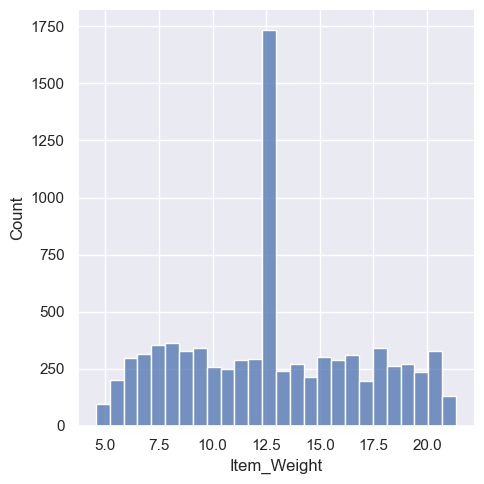

<Figure size 500x500 with 0 Axes>

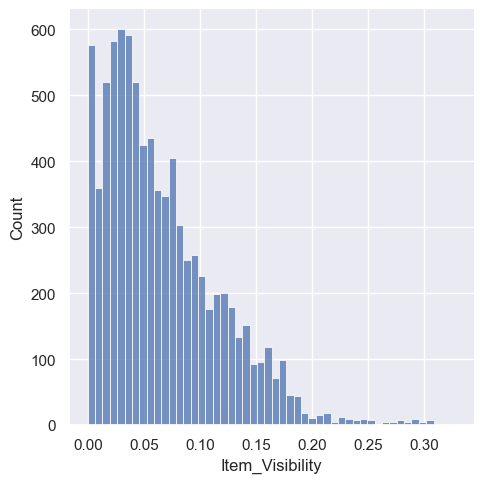

<Figure size 500x500 with 0 Axes>

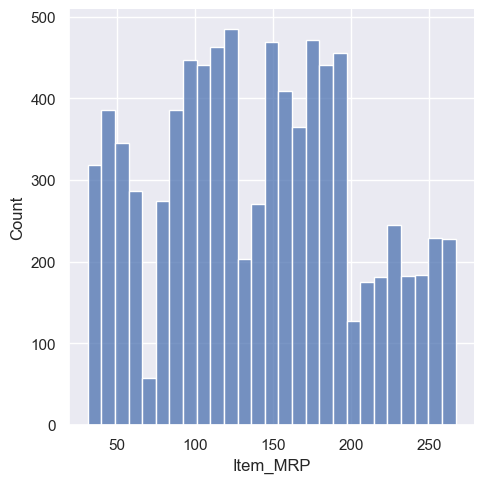

<Figure size 500x500 with 0 Axes>

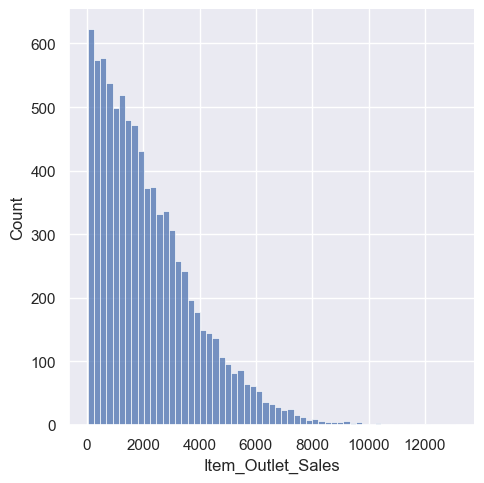

In [15]:
#Visualizing Numeric Features
sns.set()

for col in col_ls:
    if df_Data.dtypes[col]=='float64':
     plt.figure(figsize=(5,5))
     sns.displot(df_Data[col])
     plt.show()
     

In [16]:
df_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


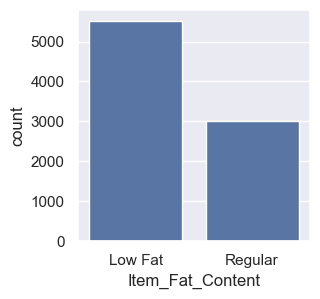

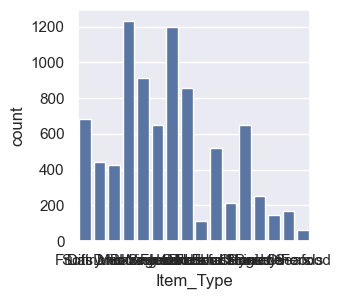

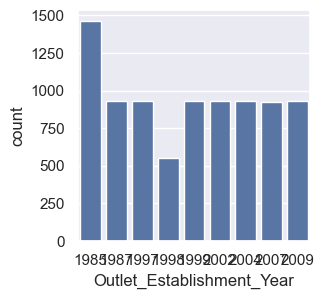

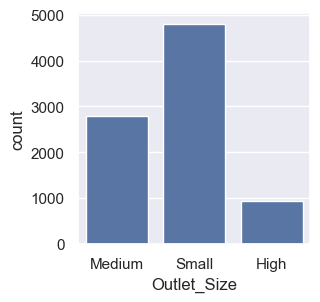

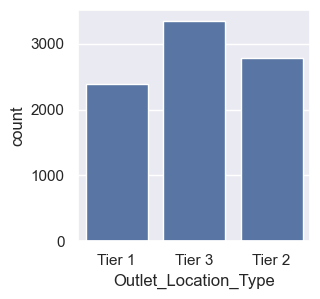

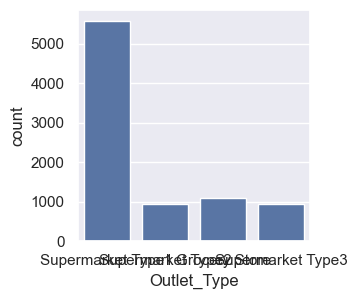

In [17]:
#Visualizing Some Categorical Features

for col in col_ls: 
 if col in ['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']:
  plt.figure(figsize=(3,3))
  sns.countplot(x=col , data=df_Data)
  plt.show()

In [18]:
#Encoding Categorical Columns by applying Label Encoding Method
LE=LabelEncoder()
for i in col_ls: 
 if df_Data.dtypes[i]=='object':
  df_Data[i]=LE.fit_transform(df_Data[i])
 

In [19]:
df_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


In [20]:
df_Data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920000,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200000,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930000,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
5,758,10.395000,1,0.000000,0,51.4008,3,2009,1,2,2,556.6088
6,696,13.650000,1,0.012741,13,57.6588,1,1987,0,2,1,343.5528
7,738,12.857645,0,0.127470,13,107.7622,5,1985,1,2,3,4022.7636
8,440,16.200000,1,0.016687,5,96.9726,7,2002,2,1,1,1076.5986
9,990,19.200000,1,0.094450,5,187.8214,2,2007,2,1,1,4710.5350


In [21]:
#Getting Numeric Features
col_ls_int=list()
for i in col_ls: 
 if df_Data.dtypes[i]=='float64':
  col_ls_int.append(i)

print(col_ls_int)
  

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']


In [22]:
df_Data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


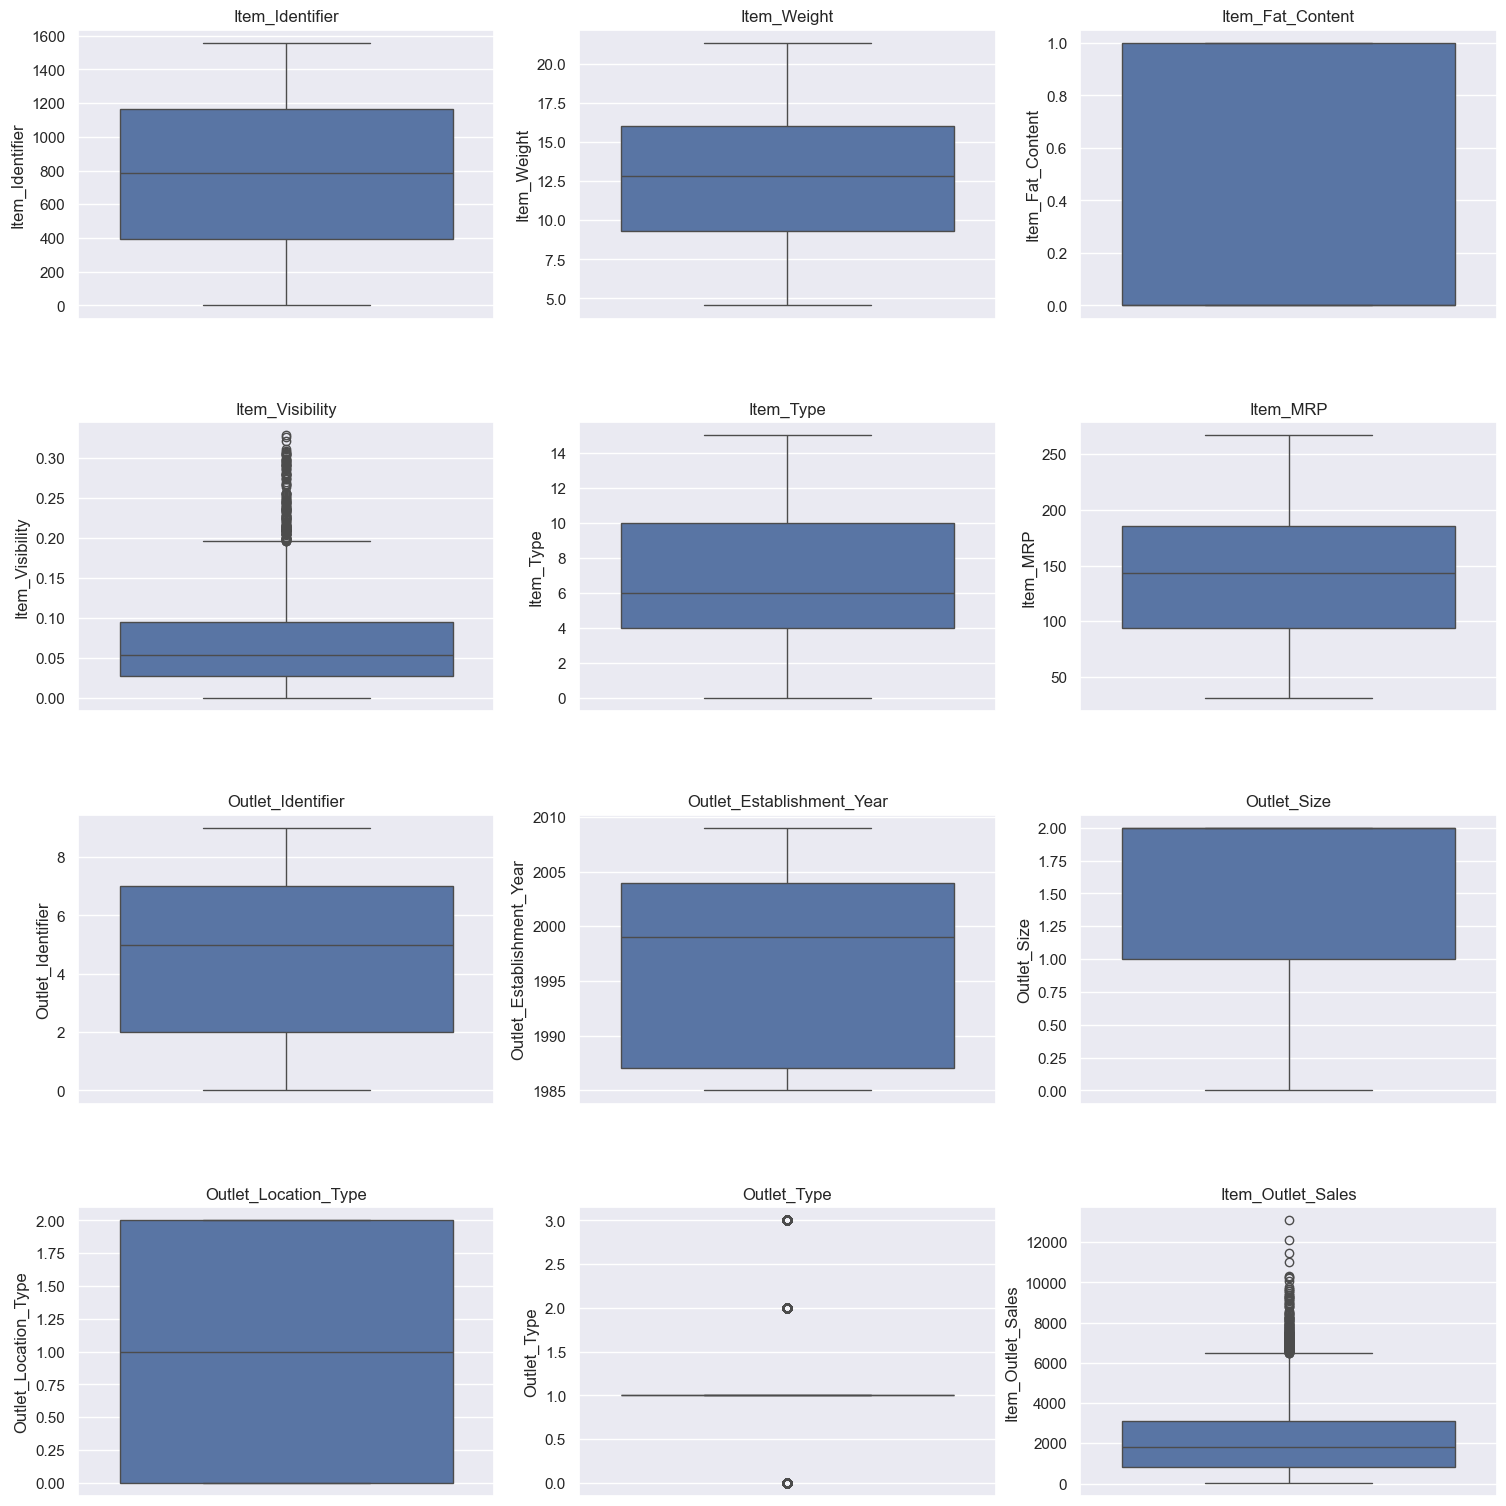

In [23]:
#Reviwing OutLiers

fig,axs=plt.subplots(4,3,figsize=(15,15))
fig.tight_layout()
fig.suptitle='Finding Outliers'
axs=axs.flatten()
j=0
for k,v in df_Data.items():
    axs[j].set_title(k)
    sns.boxplot(y=k,data=df_Data,ax=axs[j])
    j=j+1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
   


  




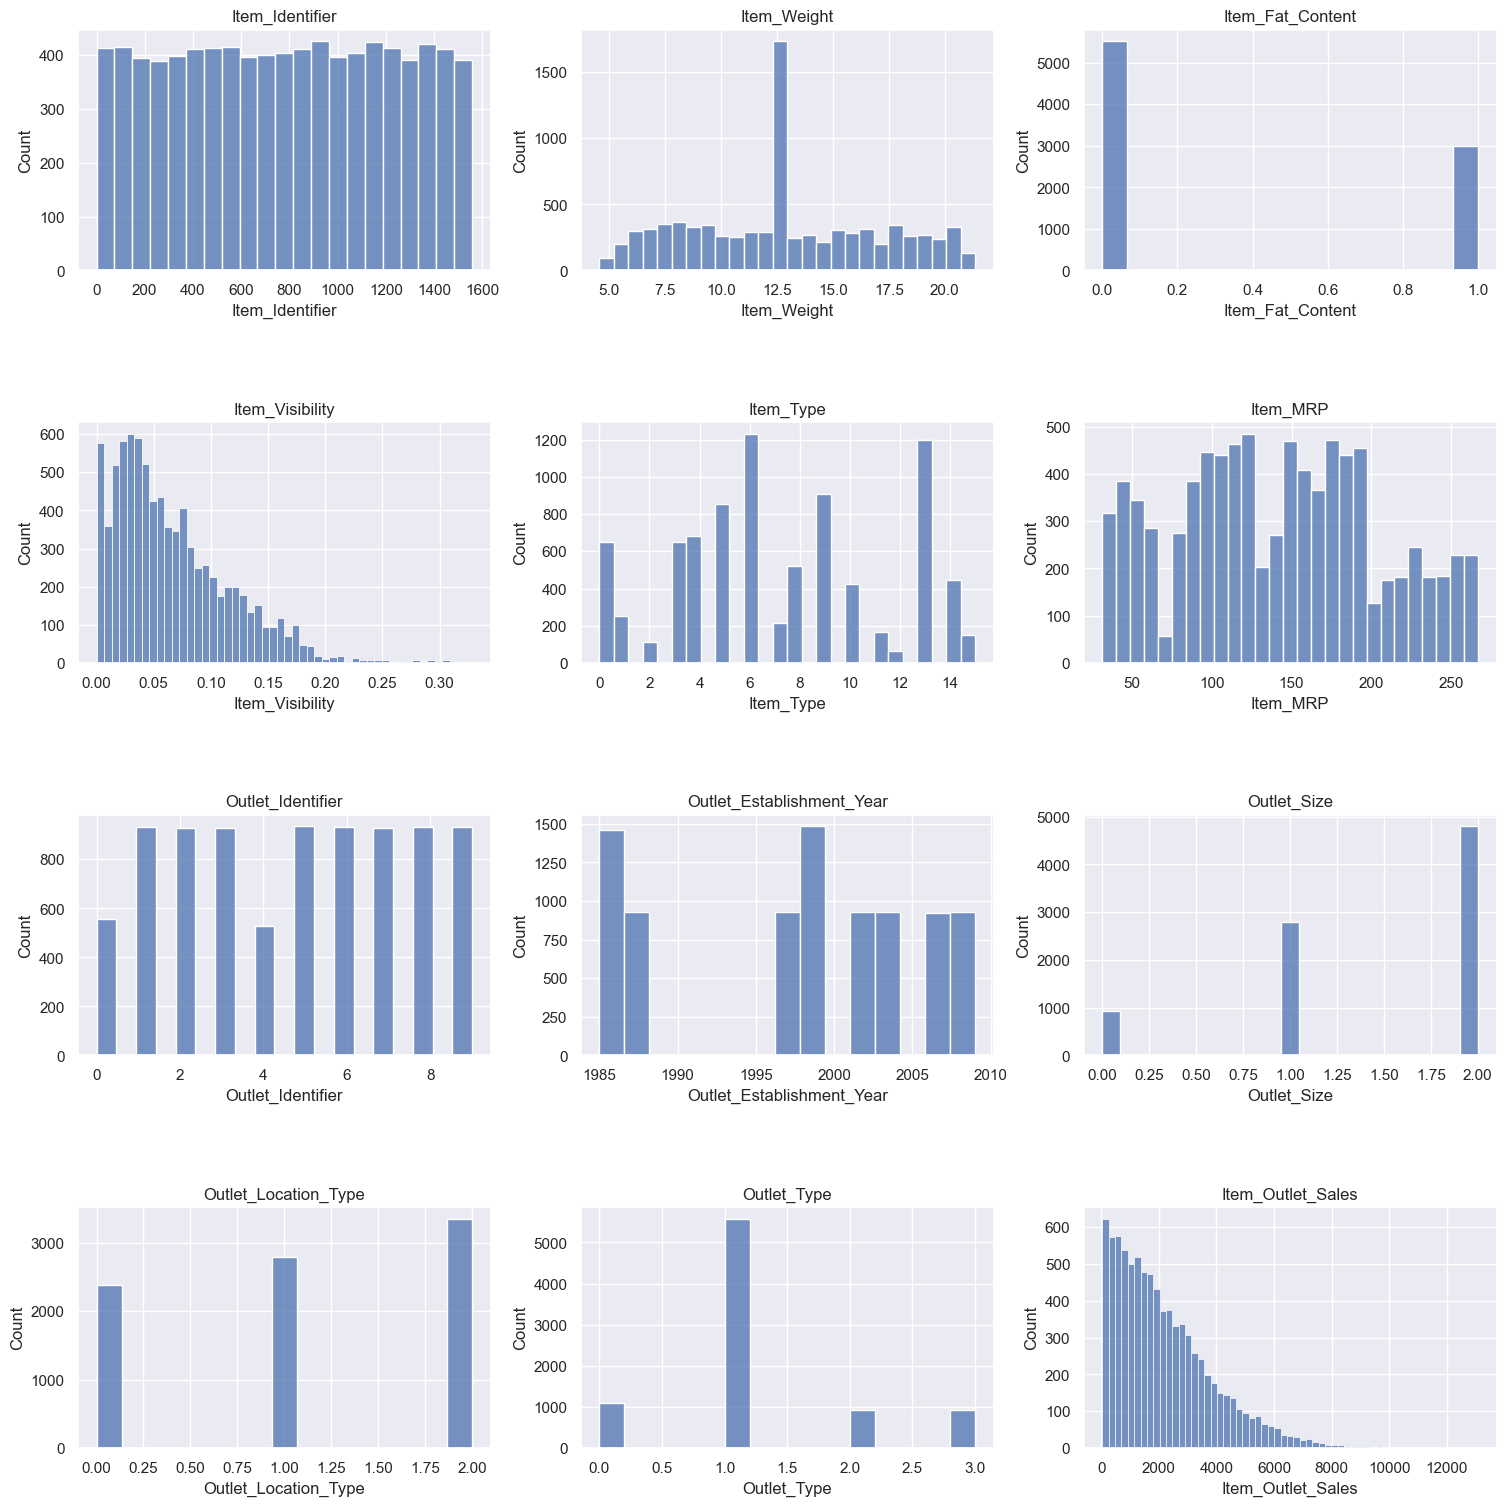

In [24]:
fig,axs=plt.subplots(4,3,figsize=(15,15))
fig.tight_layout()
fig.suptitle='Finding Outliers'
axs=axs.flatten()
j=0
for k,v in df_Data.items():
    axs[j].set_title(k)
    sns.histplot(data=v,ax=axs[j])
    j=j+1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [25]:
for k,v in df_Data.items():
  q1=v.quantile(0.25)
  q3=v.quantile(0.75)
  iqr=q3-q1
  v_out=v[(v<=q1-1.5*iqr)|(v>=q3+1.5*iqr)]
  OutPercent=np.round(v_out.shape[0]*100/df_Data.shape[0],0)
  print(f'% of Outliers in *{k}* is {OutPercent} %')
  
  
  

% of Outliers in *Item_Identifier* is 0.0 %
% of Outliers in *Item_Weight* is 0.0 %
% of Outliers in *Item_Fat_Content* is 0.0 %
% of Outliers in *Item_Visibility* is 2.0 %
% of Outliers in *Item_Type* is 0.0 %
% of Outliers in *Item_MRP* is 0.0 %
% of Outliers in *Outlet_Identifier* is 0.0 %
% of Outliers in *Outlet_Establishment_Year* is 0.0 %
% of Outliers in *Outlet_Size* is 0.0 %
% of Outliers in *Outlet_Location_Type* is 0.0 %
% of Outliers in *Outlet_Type* is 100.0 %
% of Outliers in *Item_Outlet_Sales* is 2.0 %


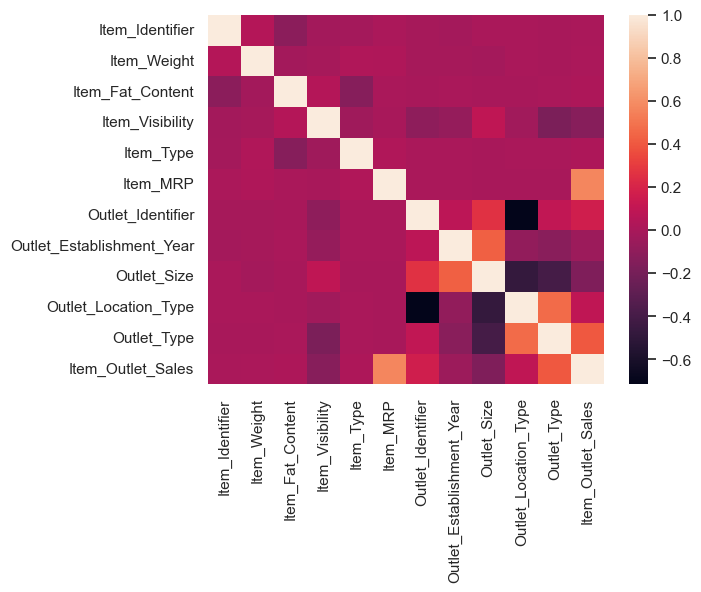

In [26]:
sns.heatmap(df_Data.corr())
plt.show()

In [27]:
df_Data.shape

(8523, 12)

In [28]:
#Scilcing DataFrame
X=df_Data.iloc[:,:-1]
y=df_Data.iloc[:,-1]


In [29]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
dtypes: float64(3), int32(7), int64(1)
memory usage: 499.5 KB


In [30]:
#Dropping Useless Columns
X=X.drop(columns=['Item_Identifier','Outlet_Identifier'],axis=1)


In [31]:
#Making Train,Test Sets
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42)
#print shape of features and training and testing data of features and labels cols
print("Shape of All Features:",df_Data.shape)
print("Shape of Features Of train Set:",X_train.shape)
print("Shape of Label Of train Set:",y_train.shape)
print("Shape of Features of test Set:",X_test.shape)
print("Shape of Label of test Set:",y_test.shape)

Shape of All Features: (8523, 12)
Shape of Features Of train Set: (6818, 9)
Shape of Label Of train Set: (6818,)
Shape of Features of test Set: (1705, 9)
Shape of Label of test Set: (1705,)


In [32]:
#Normalizing Numeric Data Columns by MaxMinScaler method

# for i in X_train[]: 
#    if (df_temp.dtypes[i]=='float64'):
#     X_train[i]=(X_train[i] - X_train[i].min()) / (X_train[i].max() - X_train[i].min())
#     print(X_train)
##-----
sc = MinMaxScaler()
sc.fit(X_train)
X_Train_temp=sc.transform(X_train)
X_Test_temp=sc.transform(X_test)
X_train=X_Train_temp
X_test=X_Test_temp
#-------
# #X_train.head(10)
# print('------------------')
# print(X_train)
# X_train['Item_Weight'] = sc.fit_transform(X_train['Item_Weight'])
# X_train['Item_Visibility'] = sc.fit_transform(X_train['Item_Visibilitype'])
# X_train['Item_MRP'] = sc.fit_transform(X_train['Item_MRP'])
# X_train['Outlet_Size'] = sc.fit_transform(X_train['Outlet_Size'])
# X_train['Outlet_Establishment_Year'] = X.fit_transform(X_train['Outlet_Establishment_Year'])






In [33]:
#Executing Model(Linear Regression)
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
y_pred_train=LR.predict(X_train)


In [35]:
df_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


In [ ]:
#Printing Coefs
print("Number Of Coefficients:",len(LR.coef_))
print("List Of Coefficients: ",list(np.round(LR.coef_,5)))

# The mean squared error


Number Of Coefficients: 9
List Of Coefficients:  [-44.82307, 67.81676, -605.35245, 3.93198, 3675.57079, 23.22614, -299.91575, -594.524, 2789.63466]


In [ ]:
#Calculating Errors of Linear Regression
#------ON Train Set
lr_MSE_train=mean_squared_error(y_train, y_pred_train)
print("Mean squared error in Train set: %.2f" % lr_MSE_train)
# The coefficient of determination: 1 is perfect prediction
lr_R2_train=r2_score(y_train, y_pred_train)
print("Coefficient of determination in Train: %.2f" % lr_R2_train)
#--------On Test Set
lr_MSE_test=mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % lr_MSE_test)
# The coefficient of determination: 1 is perfect prediction
lr_R2_test=r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" %lr_R2_test)

Mean squared error in Train set: 1487718.67
Coefficient of determination in Train: 0.50
Mean squared error: 1306457.63
Coefficient of determination: 0.52


In [ ]:
#Executing Model(Ridge Regression)
RG=Ridge()
RG.fit(X_train,y_train)
y_pred=RG.predict(X_test)
y_pred_train=RG.predict(X_train)

In [ ]:
#Calculating Errors of Ridge Model
#------ON Train Set
RG_MSE_train=mean_squared_error(y_train, y_pred_train)
print("Mean squared error in Train set: %.2f" % RG_MSE_train)
# The coefficient of determination: 1 is perfect prediction
RG_R2_train=r2_score(y_train, y_pred_train)
print("Coefficient of determination in Train set: %.2f" % RG_R2_train)
#--------On Test Set
RG_MSE_test=mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % RG_MSE_test)
# The coefficient of determination: 1 is perfect prediction
RG_R2_test=r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" % RG_R2_test)

Mean squared error in Train set: 1487726.35
Coefficient of determination in Train set: 0.50
Mean squared error: 1306531.32
Coefficient of determination: 0.52


In [ ]:
#Executing Model(XGBoost Regression)
XG=XGBRegressor()
XG.fit(X_train,y_train)
y_pred=XG.predict(X_test)
y_pred_train=XG.predict(X_train)

In [ ]:
#Calculating Errors of XGBoost Model
#------ON Train Set
XG_MSE_train=mean_squared_error(y_train, y_pred_train)
print("Mean squared error in Train set: %.2f" % XG_MSE_train)
# The coefficient of determination: 1 is perfect prediction
XG_R2_train=r2_score(y_train, y_pred_train)
print("Coefficient of determination in Train set: %.2f" % XG_R2_train)
#--------On Test Set
XG_MSE_test=mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % XG_MSE_test)
# The coefficient of determination: 1 is perfect prediction
XG_R2_test=r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" % XG_R2_test)

Mean squared error in Train set: 392866.57
Coefficient of determination in Train set: 0.87
Mean squared error: 1287974.92
Coefficient of determination: 0.53


In [ ]:
#Tabling Resualts
tbl_results=pd.DataFrame({'Models':['LinearRegression','Ridge','XGBRegressor'],
                          'MSE':[lr_MSE_test,RG_MSE_test,XG_MSE_test],
                          'R2':[np.round(lr_R2_test,6),np.round(RG_R2_test,6),np.round(XG_R2_test,6)]
                          }
                         )
print(tbl_results)


             Models           MSE        R2
0  LinearRegression  1.306458e+06  0.519326
1             Ridge  1.306531e+06  0.519299
2      XGBRegressor  1.287975e+06  0.526126


In [ ]:
#y_test=y_test.values.reshape(1705,1)
#X_test=np.arange(0,len(X_test),1)
X_train=np.arange(0,len(X_train),1)

<Axes: xlabel='Item_Outlet_Sales'>

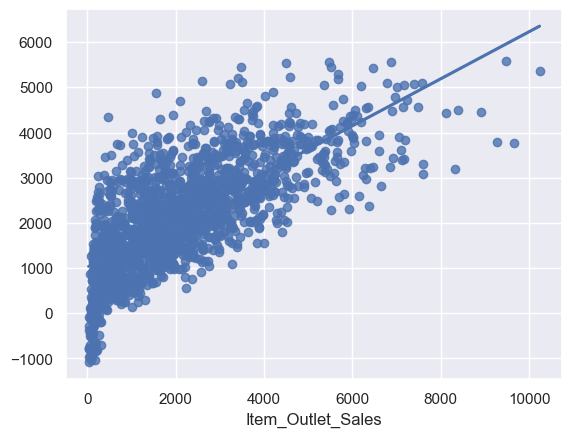

In [86]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")


<Axes: xlabel='Item_Outlet_Sales'>

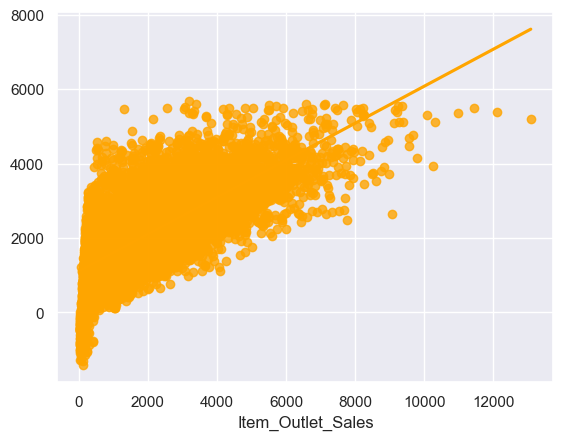

In [85]:
sns.regplot(x=y_train, y=y_pred_train, ci=None, color="orange")

C:\Users\zerangzadeh.a\AppData\Local\Temp\ipykernel_5052\1105981152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,  color="r", label="Actual Value")
C:\Users\zerangzadeh.a\AppData\Local\Temp\ipykernel_5052\1105981152.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train,

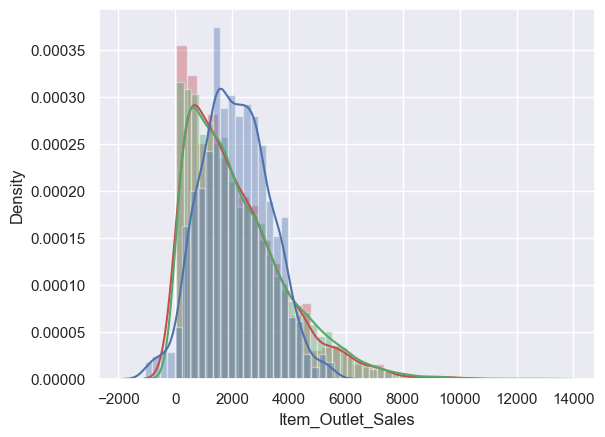

In [96]:
ax1 = sns.distplot(y_test,  color="r", label="Actual Value")
sns.distplot(y_train,  color="g", label="Train Values" , ax=ax1)
sns.distplot(y_pred,  color="b", label="Fitted Values" , ax=ax1)

plt.show()